# **Building a Neural Network from Scratch Using Pure Math and Python**
# (No high-level frameworks like Keras, Tensorflow or Pytorch will be involved)

---------------------------------------------------------------------------------------------------------------------------------------

### In this notebook, I will guide you through the implementation of simple Neural Network (to be more specific, a **Multilayered Perceptron** ) from scratch using only the theorical Math behind the Neural Nets and Python's Linear Algebra library--NumPy. The network is trained to classify digits in the MNIST dataset.

### This notebook aims to provide a better understanding of the Math and programming behind neural networks by constructing everything from ground-up. As a best practice, I've included detailed explanatory comments throughout the code to enhance understanding.

In [1]:
# Let's import only the nessary libraries
import numpy as np # A Linear Algebra library to perform Numerical calculation
import pandas as pd # To load the data
from matplotlib import pyplot as plt # To visualize the Digits
from sklearn.model_selection import train_test_split # Just to split-up the dataset conveniently

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### We can interpret that each row corresponds to a sample, so each column of a row has the sample's pixel (28x28=784). Also note that the first column of each sample is not their pixel, it's their actual value (target).

In [5]:
df.shape

(42000, 785)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# As the dataset is now in the form of DataFrame, we have to convert it into a numpy array
data = np.array(df)

### Our data now is a 2D numpy array where there are 42000 sample images and each image has 784 features (pixel value). 785 columns including the target/label.

In [8]:
data.dtype

dtype('int64')

In [9]:
m,n = data.shape # Just assigning 42000 to m (the num of rows) and 785 to n (the num of columns)

In [32]:
# Shuffling the dataset for randomness
# np.random.shuffle(data)
# Shuffling is not needed if we use the train_test_split() method
# to split the data because the random_state takes care of the shuffling internally

In [33]:
# Splitting data into features and labels
X = data[:, 1:] / 255.0  # This scales/Normalizes the values to a range of 0 to 1, improving training stability and convergence
Y = data[:, 0]  # Extracting the labels (target values) from the first column

In [12]:
# Let's now Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [13]:
# Printing the shapes of the resulting sets
print(f"Training set: {X_train.shape}, {Y_train.shape}")
print(f"Validation set: {X_val.shape}, {Y_val.shape}")
print(f"Test set: {X_test.shape}, {Y_test.shape}")

Training set: (33600, 784), (33600,)
Validation set: (4200, 784), (4200,)
Test set: (4200, 784), (4200,)


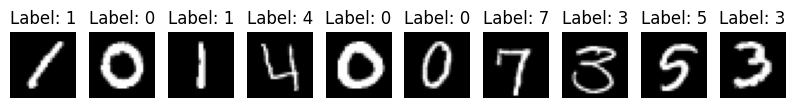

In [14]:
# Visualizing some example images from the MNIST dataset
def visualize_images(X, Y, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {Y[i]}")
        plt.axis('off')
    plt.show()
visualize_images(X, Y)    

## **Let's now create our Neural Network with the following architecture:**
### I have implemented the architecture which Grant (from 3Blue1Brown) has used through-out his Neural Net Playlist as an example. Find the visual of the architecture herehttps://youtu.be/aircAruvnKk?si=RgASU_o1gEYtUPTj&t=138

### **Let's understand the activations of each neuron in each of these layers:**

#### 1) The Input layer $a^{[0]}$ will have 784 units/neurons corresponding to the 784 pixels in each 28x28 input image.
#### 2) The 1st hidden layer $a^{[1]}$ will have 16 units/neurons with ReLU activation,
#### 3) The 2nd hidden layer $a^{[2]}$ will have 16 units/neurons with ReLU activation,
#### 4) The output layer $a^{[3]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

## **Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{ReLU}}(Z^{[2]})$$
$$Z^{[3]} = W^{[2]} A^{[2]} + b^{[3]}$$
$$A^{[3]} = g_{\text{softmax}}(Z^{[3]})$$

## **Backward propagation**

$$dZ^{[3]} = A^{[3]} - Y$$
$$dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$$
$$dB^{[3]} = \frac{1}{m} \Sigma {dZ^{[3]}}$$
$$dZ^{[2]} = W^{[3]T} dZ^{[3]} .* g^{[2]\prime} (z^{[2]})$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

## **Parameters (Weights & Biases) update**

$$W^{[3]} := W^{[3]} - \alpha dW^{[3]}$$
$$b^{[3]} := b^{[3]} - \alpha db^{[3]}$$
$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$


## **Forward propogation values**

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 16 x m
- $W^{[1]}$: 16 x 784
- $B^{[1]}$: 16 x 1
- $Z^{[2]} \sim A^{[2]}$: 16 x m
- $W^{[2]}$: 16 x 16
- $B^{[2]}$: 16 x 1
- $Z^{[3]} \sim A^{[3]}$: 10 x m
- $W^{[3]}$: 10 x 16
- $B^{[3]}$: 10 x 1

## **Backward propogation values**

- $dZ^{[3]}$: 10 x m ($~A^{[3]}$)
- $dW^{[3]}$: 10 x 16
- $dB^{[3]}$: 10 x 1
- $dZ^{[2]}$: 16 x m ($~A^{[2]}$)
- $dW^{[2]}$: 16 x 16
- $dB^{[2]}$: 16 x 1
- $dZ^{[1]}$: 16 x m ($~A^{[1]}$)
- $dW^{[1]}$: 16 x 784
- $dB^{[1]}$: 16 x 1

## To sum-up: 

- Do Forward pass, calculate the Loss.
- Do Backward pass, adjust the parameters (weights & biases).
- Repeat it until getting the desired performance.

### If the formulas isn't making sense to you, I would highly suggest you to go through the 3Blue1Brown's Neural Network Playlist: https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=ipSxlbWa0Bs8W8kE. This one playlist is 100X better than any of the courses available in the market where Grant covers the heart mathematical details such as Partial Derivatives, Gradient Computation, -ve Gradients, Probability distribution and more.

## **Alright, Lets jump into coding our desired neural net**

## **1) Initializing random weights & biases (parameters) for the neural network:**

In [15]:
# Initialize Parameters
def init_params():
    # Initialize weights and biases for the first layer
    # W1: Weight matrix of shape (16, 784), connecting 784 input features to 16 neurons
    # b1: Bias vector of shape (16, 1), one bias per neuron in the first layer
    W1 = np.random.rand(16, 784) - 0.5  # Random values between -0.5 and 0.5
    b1 = np.random.rand(16, 1) - 0.5    # Random values between -0.5 and 0.5
    
    # Initialize weights and biases for the second layer
    # W2: Weight matrix of shape (16, 16), connecting 16 neurons in layer 1 to 16 neurons in layer 2
    # b2: Bias vector of shape (16, 1), one bias per neuron in the second layer
    W2 = np.random.rand(16, 16) - 0.5   # Random values between -0.5 and 0.5
    b2 = np.random.rand(16, 1) - 0.5    # Random values between -0.5 and 0.5
    
    # Initialize weights and biases for the output layer
    # W3: Weight matrix of shape (10, 16), connecting 16 neurons in layer 2 to 10 output classes
    # b3: Bias vector of shape (10, 1), one bias per output class
    W3 = np.random.rand(10, 16) - 0.5   # Random values between -0.5 and 0.5
    b3 = np.random.rand(10, 1) - 0.5    # Random values between -0.5 and 0.5
    
    # Return all initialized parameters
    return W1, b1, W2, b2, W3, b3

## **2) Defining the Activaation functions (to introduce non-linearity to our network) and their derivatives:**

In [16]:
# ReLU (Rectified Linear Unit) Activation Function
# Helps the network focus on important features (positive signals) 
# while ignoring noise or irrelevant parts (negative signals).
def ReLU(Z): 
    return np.maximum(Z, 0)  # Replaces negative values with 0, keeps positive values unchanged.

# Derivative of ReLU
# Used during backpropagation to calculate how the loss changes with respect to the weights
# by passing gradients only for active neurons (Z > 0).
def ReLU_deriv(Z):
    return Z > 0  # Returns 1 for positive Z values, 0 for non-positive Z values.

# Softmax Activation Function
# Commonly used in multi-class classification tasks.
# Converts raw scores (logits) into probabilities, ensuring the output sums to 1.
def softmax(Z): 
    A = np.exp(Z) / sum(np.exp(Z))  # Exponentiate and normalize to form probabilities.
    return A

## **3) Defining the Forward Propagation:**

In [17]:
# Forward propagation
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    # Layer 1: Compute the weighted sum (Z1) and apply the ReLU activation
    Z1 = W1.dot(X) + b1  # Z1: Weighted sum of inputs and weights for the first layer
    A1 = ReLU(Z1)        # A1: Activation output using ReLU for the first layer
    
    # Layer 2: Compute the weighted sum (Z2) and apply the ReLU activation
    Z2 = W2.dot(A1) + b2 # Z2: Weighted sum of activations from layer 1 and weights for the second layer
    A2 = ReLU(Z2)        # A2: Activation output using ReLU for the second layer
    
    # Layer 3 (Output Layer): Compute the weighted sum (Z3) and apply the softmax activation
    Z3 = W3.dot(A2) + b3 # Z3: Weighted sum of activations from layer 2 and weights for the third layer
    A3 = softmax(Z3)     # A3: Activation output using softmax to generate class probabilities
    
    # Return all intermediate values for backpropagation
    return Z1, A1, Z2, A2, Z3, A3

## **4) Defining the Encoding:**

In [18]:
# One-hot Encoding Function
# Converts class labels into a one-hot encoded matrix.
# Each column of the output matrix represents the one-hot encoded vector of a class label.
def one_hot(Y):
    # Create a zero matrix of shape (number of labels, number of classes)
    # Y.size: Number of samples (labels)
    # Y.max() + 1: Number of classes (assuming class labels start from 0)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  
    
    # Set the element corresponding to each label index to 1
    # np.arange(Y.size): Generates indices for each sample
    # Y: Class labels (used to index columns)
    one_hot_Y[np.arange(Y.size), Y] = 1  
    
    # Transpose the matrix to make each column a one-hot encoded vector
    # Output shape: (number of classes, number of samples)
    one_hot_Y = one_hot_Y.T  
    
    return one_hot_Y  # Return the one-hot encoded matrix

## **5) Defining the Backward Propagation:**

In [19]:
# Backward propagation to calculate gradients for weights and biases
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)  # Convert labels into one-hot encoded format
    dZ3 = A3 - one_hot_Y  # Gradient of the loss with respect to Z3 (output layer)
    dW3 = 1 / m * dZ3.dot(A2.T)  # Gradient of the loss with respect to W3
    db3 = 1 / m * np.sum(dZ3)  # Gradient of the loss with respect to b3
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)  # Gradient of loss with respect to Z2
    dW2 = 1 / m * dZ2.dot(A1.T)  # Gradient of the loss with respect to W2
    db2 = 1 / m * np.sum(dZ2)  # Gradient of the loss with respect to b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  # Gradient of the loss with respect to Z1
    dW1 = 1 / m * dZ1.dot(X.T)  # Gradient of the loss with respect to W1
    db1 = 1 / m * np.sum(dZ1)  # Gradient of the loss with respect to b1
    return dW1, db1, dW2, db2, dW3, db3

## **5) Defining the parameters adjustment/update:**

In [20]:
# Update weights and biases using gradient descent
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1  # Update W1
    b1 = b1 - alpha * db1  # Update b1
    W2 = W2 - alpha * dW2  # Update W2
    b2 = b2 - alpha * db2  # Update b2
    W3 = W3 - alpha * dW3  # Update W3
    b3 = b3 - alpha * db3  # Update b3
    return W1, b1, W2, b2, W3, b3

## **6) Defining Prediction and Accuracy:**

In [21]:
# Get the predicted class labels from output probabilities
def get_predictions(A3):
    return np.argmax(A3, 0)  # Index of the maximum probability in each column

# Calculate the accuracy of predictions
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size  # Fraction of correct predictions

## **7) Defining Gradient Descent Training:**

In [23]:
# Train the model using gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()  # Initialize weights and biases
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)  # Forward pass
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)  # Backpropagation
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)  # Parameter update
        if i % 10 == 0:  # Periodically print training accuracy
            predictions = get_predictions(A3)
            print(f"Iteration {i}: Accuracy = {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2, W3, b3

In [24]:
X_train = X_train.T # Matrix Transpose

### The above line transposes the training data matrix X_train. This is typically done because the matrix dimensions need to align with the matrix multiplications in the forward and backward propagation steps of the neural network.

 ## **8) Initiating the training:**

In [25]:
# Time to train our model
W1, b1, W2, b2, W3, b3  = gradient_descent(X_train, Y_train, 0.20, 3000) 

Iteration 0: Accuracy = 0.11139880952380952
Iteration 10: Accuracy = 0.29020833333333335
Iteration 20: Accuracy = 0.4313095238095238
Iteration 30: Accuracy = 0.5331547619047619
Iteration 40: Accuracy = 0.6120238095238095
Iteration 50: Accuracy = 0.6661309523809524
Iteration 60: Accuracy = 0.7038988095238096
Iteration 70: Accuracy = 0.7299404761904762
Iteration 80: Accuracy = 0.7024107142857143
Iteration 90: Accuracy = 0.7594345238095238
Iteration 100: Accuracy = 0.76375
Iteration 110: Accuracy = 0.7726488095238095
Iteration 120: Accuracy = 0.7886309523809524
Iteration 130: Accuracy = 0.7944940476190476
Iteration 140: Accuracy = 0.8005654761904762
Iteration 150: Accuracy = 0.8085714285714286
Iteration 160: Accuracy = 0.8164583333333333
Iteration 170: Accuracy = 0.8216964285714285
Iteration 180: Accuracy = 0.8266964285714286
Iteration 190: Accuracy = 0.8319047619047619
Iteration 200: Accuracy = 0.8357738095238095
Iteration 210: Accuracy = 0.8410416666666667
Iteration 220: Accuracy = 0.84

In [26]:
# Test the model on individual samples
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_val[index].reshape((28, 28))  # Reshape image for visualization
    prediction = make_predictions(X_val[index].reshape(-1, 1), W1, b1, W2, b2, W3, b3)  # Get model prediction
    label = Y_val[index]  # True label
    print(f"Prediction: {prediction}, Label: {label}")
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')  # Display image
    plt.show()

In [27]:
# Make predictions for a dataset
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)  # Forward pass
    predictions = get_predictions(A3)  # Get predicted class
    return predictions

Prediction: [6], Label: 6


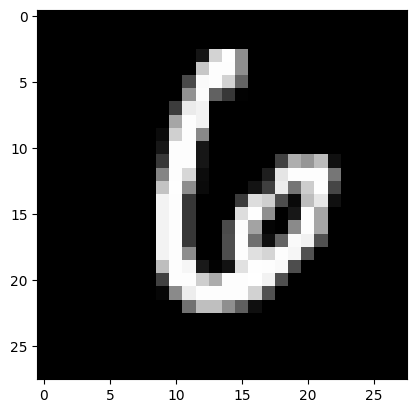

Prediction: [2], Label: 2


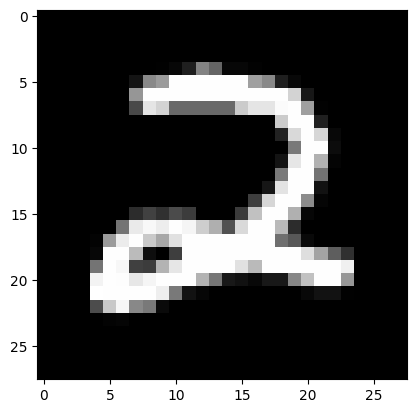

Prediction: [4], Label: 4


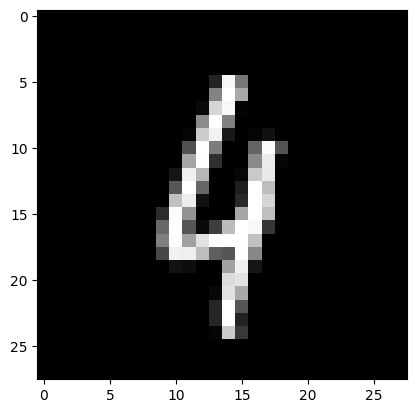

Prediction: [6], Label: 6


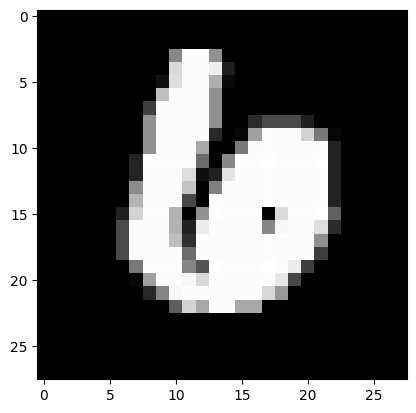

Prediction: [1], Label: 1


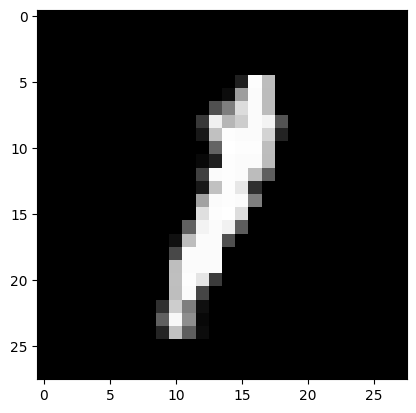

Prediction: [9], Label: 9


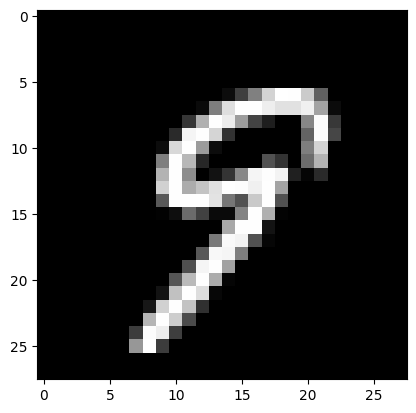

In [28]:
# Visualize some predictions
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)
test_prediction(4, W1, b1, W2, b2, W3, b3)
test_prediction(5, W1, b1, W2, b2, W3, b3)

## **9) Testing our model on unseen data:**
### I have splitted dataset into 3 partitions (train, test, and validation) where we have used only the train set keeping away the other 2 sets unseen from our model. So let's now test our trained model on both the unseen dataset.

In [30]:
test_predictions = make_predictions(X_test.T, W1, b1, W2, b2, W3, b3)
test_accuracy = get_accuracy(test_predictions, Y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9388095238095238


In [31]:
# Validating the model
val_predictions = make_predictions(X_val.T, W1, b1, W2, b2, W3, b3)
val_accuracy = get_accuracy(val_predictions, Y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9385714285714286


### With a simple Multilayer Perceptron (MLP) built entirely from scratch using a bunch of Mathematical formulas and NumPy, we achieved an impressive 93% accuracy on the unseen MNIST handwritten digit dataset. This showcases the power of even basic neural networks to recognize patterns in data.

By ***Mohamed Shafeek T***